# TP : Simulation de collision

## Particules dans une boîte

On considère des particules sous forme de disque, définies par le type ci-dessous.

In [42]:
from dataclasses import dataclass

@dataclass
class Particule:
    x: float
    y: float
    vx: float
    vy: float
    m: float
    r: float

Vous n'avez pas besoin de comprendre le code ci-dessus, mais seulement de savoir l'utiliser :

In [43]:
p = Particule(x=0, y=0, vx=1, vy=1, m=1, r=1) # définir une particule
print(p.x) # accéder à la position suivant x
print(p.vx) # accéder à la vitesse suivant x
p.vx = 2 # modifier la vitesse suivant x

0
1


````{admonition} Question
 Écrire une fonction `aleatoire(a, b)` qui renvoie un nombre aléatoire dans l'intervalle $[a, b]$. Pour cela on utilisera `random()` de la bibliothèque `random`, qui renvoie un nombre aléatoire dans l'intervalle $[0, 1]$.
````

In [44]:
from random import random

def aleatoire(a, b):
    return a + (b - a)*random()

````{admonition} Solution
:class: tip, dropdown
``` python
from random import random

def aleatoire(a, b):
    return a + (b - a) * random()
```
````

In [45]:
aleatoire(1, 10)

9.625160536376631

````{admonition} Question
 Écrire une fonction `particules_aléatoires(n)` qui renvoie une liste de `n` particules aléatoires `p` où :
- `p.x` et `p.y` sont des coordonnées aléatoires dans l'intervalle $[0, 10]$.
- `p.vx` et `p.vy` sont des vitesses aléatoires dans l'intervalle $[-1, 1]$.
- `p.m` est une masse aléatoire dans l'intervalle $[1, 10]$.
- `p.r` est égal à $0.5$.

On utilisera `random()` du module `random` pour générer un nombre aléatoire dans l'intervalle $[0, 1]$.
````

In [46]:
def particules_aléatoires(n):
    return [Particule(x=aleatoire(0, 10), y=aleatoire(0, 10), vx=aleatoire(-1, 1), vy=aleatoire(-1, 1), m=aleatoire(1, 10), r=.5) for _ in range(n)]

````{admonition} Solution
:class: tip, dropdown
``` python
def particules_aléatoires(n):
    return [Particule(x=aleatoire(0, 10), y=aleatoire(0, 10), vx=aleatoire(-1, 1), vy=aleatoire(-1, 1), m=aleatoire(1, 10), r=.5) for _ in range(n)]
```
````

In [47]:
particules_aléatoires(3)

[Particule(x=8.012506885437048, y=2.2738768640647447, vx=-0.33900253583993756, vy=-0.32111282453254675, m=3.424671113225731, r=0.5),
 Particule(x=3.054691155419329, y=7.641142622672296, vx=-0.4107168980485765, vy=-0.36131634454190387, m=3.289963576584819, r=0.5),
 Particule(x=7.268539233228957, y=0.7750874223884974, vx=0.7153630952590337, vy=-0.10303517430885867, m=1.4921656829463044, r=0.5)]

````{admonition} Question
 Écrire une fonction `avance(p, dt)` qui déplace la position de la particule `p` pendant `dt` secondes.  
Il faut donc modifier `p.x` et `p.y` en fonction de `p.vx`, `p.vy` et `dt`.
````

In [48]:
def avance(p, dt):
    p.x += p.vx * dt
    p.y += p.y + p.vy * dt

````{admonition} Solution
:class: tip, dropdown
``` python
def avance(p, dt):
    p.x += p.vx * dt
    p.y += p.vy * dt
```
````

In [49]:
p = Particule(x=0, y=0, vx=1, vy=2, m=1, r=1)
avance(p, .1)
p

Particule(x=0.1, y=0.2, vx=1, vy=2, m=1, r=1)

On suppose que la particule `p` est dans un carré de hauteur et largeur $h$.  
Si `p` touche un bord vertical du carré, on change le signe de `p.vx` (`p.vx = -p.vx`).  
Si `p` touche un bord horizontal du carré, on change le signe de `p.vy`.

<center><img src=https://raw.githubusercontent.com/fortierq/tikz-pdf/main/geometry/collision/bord/bord.png width=300><br>
Particule avant et après collision avec un bord</center>

````{admonition} Question
 Écrire une fonction `bord(p, h)` qui modifie la vitesse de `p` si elle touche un bord du carré.
````

In [50]:
def bord(p, h):
    if p.x - p.r < 0:
        p.vx *= - 1
    if p.x + p.r > h:
        p.vx *= - 1
    if p.y - p.r < 0:
        p.vy *= - 1
    if p.y + p.r > h:
        p.vy *= - 1

````{admonition} Solution
:class: tip, dropdown
``` python
def bord(p, h):
    if p.x < 0:
        p.vx = -p.vx
    if p.x > h:
        p.vx = -p.vx
    if p.y < 0:
        p.vy = -p.vy
    if p.y > h:
        p.vy = -p.vy
```
````

````{admonition} Question
 Écrire une fonction `etape(particules, h, dt)` qui parcourt chaque particule `p` de la liste `particules` et qui appelle `bord` et `avance` dessus.  
Tester avec `animation(particules_aléatoires(3))` (on pourra changer le nombre de particules).
````

In [51]:
def etape(particules, h, dt):
    for particule in particules:
        bord(particule, h)
        avance(particule, dt)

````{admonition} Solution
:class: tip, dropdown
``` python
def etape(particules, h, dt):
    for p in particules:
        bord(p, h)
        avance(p, dt)
```
````

In [52]:
%matplotlib ipympl
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from matplotlib.patches import Circle

def animation(particules, n=200):
    h = 10
    fig = plt.figure()
    ax = plt.axes(xlim=(0, h), ylim=(0, h))
    ax.set_aspect('equal', 'box')
    cercles = [Circle(xy=(p.x, p.y), radius=p.r) for p in particules]
    for c in cercles:
        ax.add_patch(c)
    def init():
        return cercles
    def animate(i):
        for _ in range(30):
            etape(particules, h, .01)
        for c, p in zip(cercles, particules):
            c.center = (p.x, p.y)
        return cercles
    anim = FuncAnimation(fig, animate, init_func=init, frames=n, interval=20, blit=True)
    plt.show()
    # return HTML(anim.to_jshtml())

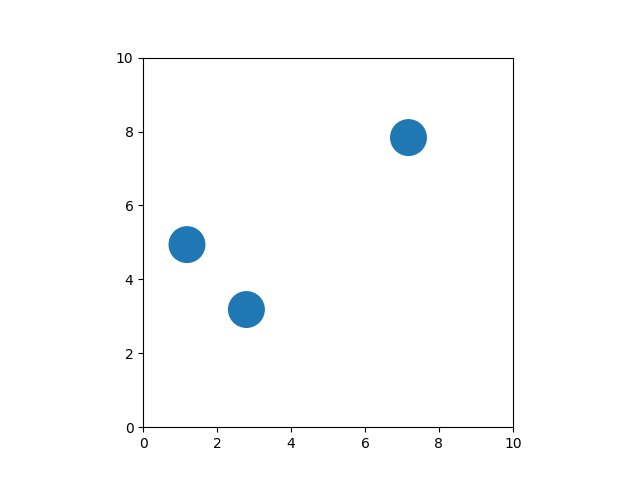

In [64]:
animation(particules_aléatoires(3))

## Collisions entre particules

On considère deux particules `p1` et `p2` et on veut savoir si elles se touchent.

<center><img src=https://raw.githubusercontent.com/fortierq/tikz-pdf/main/geometry/collision/collision.png width=300></center>

````{admonition} Question
 Sur la figure ci-dessus, à quelle condition sur $d$, $r_1$, $r_2$ y a t-il collision entre $p_1$ et $p_2$ ?  
En déduire une fonction `collision(p1, p2)` qui prend en argument deux particules et qui renvoie `True` si elles sont en collision et `False` sinon.	
````

In [54]:
def collision(p1, p2):
    return (p2.x - p1.x)**2 + (p2.y - p1.y)**2 <= (p1.r + p2.r)**2

````{admonition} Solution
:class: tip, dropdown
``` python
def collision(p1, p2):
    return (p1.x - p2.x)**2 + (p1.y - p2.y)**2 <= (p1.r + p2.r)**2
```
````

In [55]:
print(collision(Particule(x=0, y=0, vx=1, vy=2, m=1, r=1), Particule(x=.5, y=.5, vx=1, vy=2, m=1, r=1)))
print(collision(Particule(x=0, y=0, vx=1, vy=2, m=1, r=1), Particule(x=2, y=2, vx=1, vy=2, m=1, r=1)))

True
False


### En une dimension

On considère une collision parfaitement élastique (c'est-à-dire que l'énergie cinétique $\frac{1}{2}mv^2$ et la quantité de mouvement $mv$ sont conservées) entre deux particules $p_1$ et $p_2$, le long d'un axe $x$.

<center><img src=https://raw.githubusercontent.com/fortierq/tikz-pdf/main/geometry/collision/elastique/elastique.png width=400></center>

On appelle $v_1$ la vitesse de $p_1$ avant le choc et $v_1'$ la vitesse après le choc. De même pour $p_2$. 

````{admonition} Question
 Écrire les équations obtenues par conservation de l'énergie cinétique et de la quantité de mouvement.
````

$$
\begin{align*}
m_1 v_1 + m_2 v_2 &= m_1 v_1' + m_2 v_2' \\
m_1 v_1^2 + m_2 v_2^2 &= m_1 v_1'^2 + m_2 v_2'^2
\end{align*}
$$

````{admonition} Question
 En déduire une expression pour $v_1'$ et $v_2'$.
````

$$
\begin{align*}
v_1' &= \frac{m_1 - m_2}{m_1 + m_2} v_1 + \frac{2 m_2}{m_1 + m_2} v_2 \\
v_2' &= \frac{2 m_1}{m_1 + m_2} v_1 + \frac{m_2 - m_1}{m_1 + m_2} v_2
\end{align*}
$$

````{admonition} Question
 Écrire une fonction `vitesse_collision(p1, p2)` qui modifie `p1.vx` et `p2.vx` en `v1'` et `v2'`.
````

In [56]:
def vitesse_collision(p1, p2):
    v1_ = ((p1.m - p2.m) / (p1.m + p2.m)) * p1.vx + ((2*p2.m) / (p1.m + p2.m)) * p2.vx
    v2_ = ((p2.m - p1.m) / (p1.m + p2.m)) * p2.vx + ((2*p1.m) / (p1.m + p2.m)) * p1.vx
    p1.vx = v1_
    p2.vx = v2_

````{admonition} Solution
:class: tip, dropdown
``` python
def vitesse_collision(p1, p2):
    m = p1.m + p2.m
    v1_ = p1.vx*(p1.m - p2.m)/m + 2*p2.vx*p2.m/m
    v2_ = p2.vx*(p2.m - p1.m)/m + 2*p1.vx*p1.m/m
    p1.vx = v1_
    p2.vx = v2_
```
````

````{admonition} Question
 Réécrire la fonction `etape(particules, h, dt)` en appelant `collision` et `vitesse_collision` pour simuler les collisions parmis les particules.
````

In [57]:
def etape(particules, h, dt):
    for i in range(len(particules)):
        for j in range(i + 1, len(particules)):
            part1, part2 = particules[i], particules[j]
            if collision(part1, part2):
                vitesse_collision(part1, part2)
    for part in particules:
        bord(part, h)
        avance(part, dt)
    

````{admonition} Solution
:class: tip, dropdown
``` python
def etape(particules, h, dt):
    for i1 in range(len(particules)):
        for i2 in range(i1 + 1, len(particules)):
            p1, p2 = particules[i1], particules[i2]
            if collision(p1, p2):
                vitesse_collision(p1, p2)
    for p in particules:
        bord(p, h)
        avance(p, dt)
```
````

````{admonition} Question
 Tester avec l'appel de fonction ci-dessous. On pourra changer les masses, les vitesses et rajouter des particules.
````

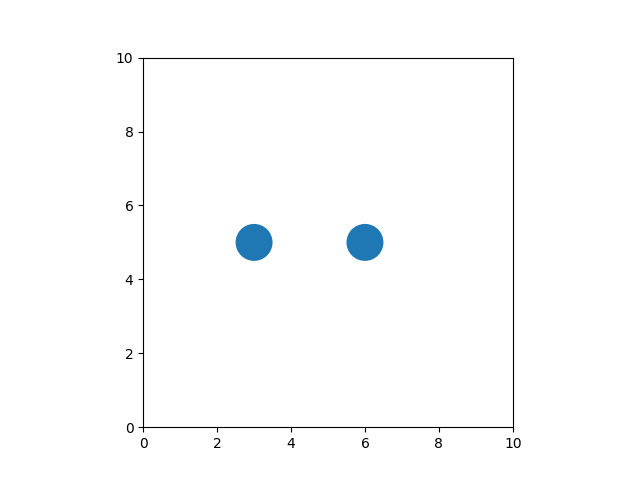

In [65]:
animation([Particule(x=3, y=5, vx=2, vy=0, m=1, r=.5), Particule(x=6, y=5, vx=0, vy=0, m=10, r=.5)])

### En deux dimensions

On note $\mathbf{c}_1$, $\mathbf{v}_1$ le vecteur position et le vecteur vitesse de $p_1$. De même pour $p_2$.  
On peut alors montrer que les vecteurs vitesses après collision (en deux dimensions) sont donnés par :

\begin{align}
\mathbf{v}'_1&=\mathbf{v}_1-\frac{2 m_2}{m_1+m_2} \ \frac{\langle \mathbf{v}_1-\mathbf{v}_2,\,\mathbf{c}_1-\mathbf{c}_2\rangle}{\|\mathbf{c}_1-\mathbf{c}_2\|^2} \ (\mathbf{c}_1-\mathbf{c}_2),
\\
\mathbf{v}'_2&=\mathbf{v}_2-\frac{2 m_1}{m_1+m_2} \ \frac{\langle \mathbf{v}_2-\mathbf{v}_1,\,\mathbf{c}_2-\mathbf{c}_1\rangle}{\|\mathbf{c}_2-\mathbf{c}_1\|^2} \ (\mathbf{c}_2-\mathbf{c}_1)
\end{align}

Les opérations ci-dessus étant vectorielles, il est plus pratique d'utiliser `numpy`, pour additioner et multiplier des vecteurs :

In [59]:
import numpy as np

p1, p2 = Particule(x=0, y=0, vx=1, vy=2, m=1, r=1), Particule(x=2, y=2, vx=1, vy=2, m=1, r=1) # exemple
v1, v2 = np.array([p1.vx, p1.vy]), np.array([p2.vx, p2.vy])
print(v1 + v2) # addition de vecteurs
print(np.dot(v1, v2)) # produit scalaire
print(np.dot(v1, v1)) # norme de v1 (produit scalaire de v1 et v1)

[2 4]
5
5


````{admonition} Question
 Réécrire `vitesse_collision(p1, p2)` en utilisant `numpy` et les équations ci-dessus. Tester avec `animation(particules_aléatoires(5))`.
````

In [60]:
def vitesse_collision(p1, p2):
    c1, c2 = np.array([p1.vx, p1.vy]), np.array([p2.vx, p2.vy])
    v1, v2 = np.array([p1.vx, p1.vy]), np.array([p2.vx, p2.vy])
    p1.vx, p1.vy = v1 - 2 * p2.m / (p1.m + p2.m) * np.dot(v1 - v2, c1 - c2) / np.dot(c1 - c2, c1 - c2) * (c1 - c2)
    p2.vx, p2.vy = v2 - 2 * p1.m / (p1.m + p2.m) * np.dot(v2 - v1, c2 - c1) / np.dot(c2 - c1, c2 - c1) * (c2 - c1)

````{admonition} Solution
:class: tip, dropdown
``` python
def vitesse_collision(p1, p2):
    c1, c2 = np.array([p1.vx, p1.vy]), np.array([p2.vx, p2.vy])
    v1, v2 = np.array([p1.vx, p1.vy]), np.array([p2.vx, p2.vy])
    p1.vx, p1.vy = v1 - 2*p2.m/(p1.m + p2.m) * np.dot(v1 - v2, c1 - c2) / np.dot(c1 - c2, c1 - c2) * (c1 - c2)
    p2.vx, p2.vy = v2 - 2*p1.m/(p1.m + p2.m) * np.dot(v2 - v1, c2 - c1) / np.dot(c2 - c1, c2 - c1) * (c2 - c1)
```
````

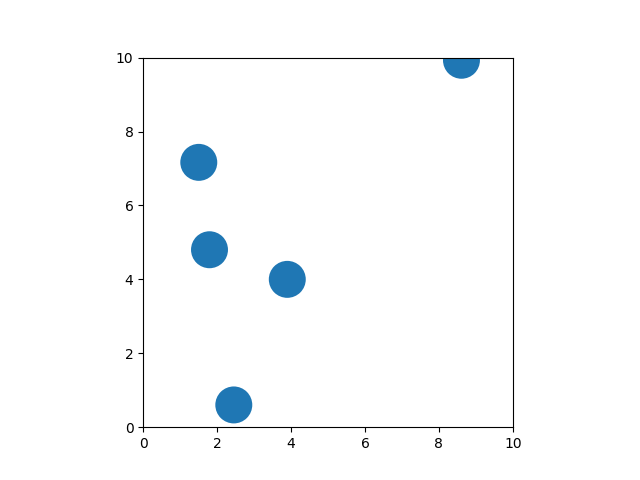

In [61]:
animation(particules_aléatoires(5))

## Avec la gravité

````{admonition} Question
 Réécrire `avance(p, dt)` en ajoutant la gravité. Exceptionnellement, on prendra $g = 0.4$.
````

In [62]:
def avance(p, dt):
    p.x += p.vx * dt
    p.y += p.vy * dt - .4 * dt

````{admonition} Solution
:class: tip, dropdown
``` python
def avance(p, dt):
    p.vy -= .4 * dt
    p.x += p.vx * dt
    p.y += p.vy * dt
```
````

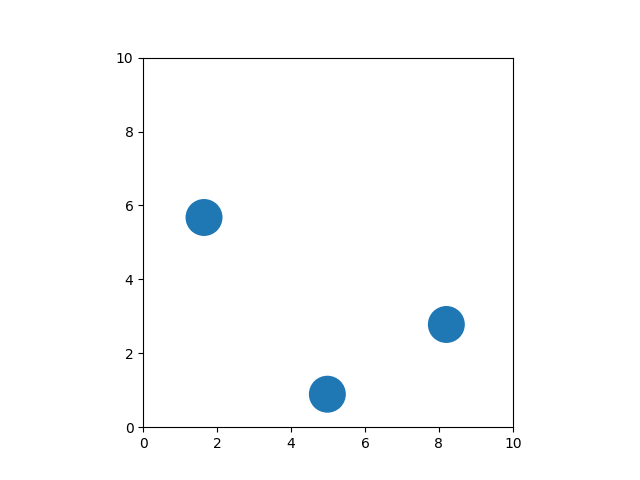

In [63]:
animation(particules_aléatoires(3))